In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("output/processed_gym_members_data.csv")

In [17]:
X = df.drop('Experience_Level', axis=1)  # Features
y = df['Experience_Level']  # Target


In [18]:
df.head(10)


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0.711632,-0.099794,180,157,60,1.283569,1313.0,12.6,3.5,4,3,30.20,True,False,False,True
1,46,0.062843,-1.541869,179,151,66,0.121623,883.0,33.9,2.1,4,2,32.00,False,True,False,False
2,32,-0.266394,-0.500370,167,122,54,-0.444452,677.0,33.4,2.3,4,2,24.71,False,False,False,False
3,25,-0.987808,-0.179909,190,164,56,-1.993713,532.0,28.8,2.1,3,1,18.41,True,False,True,False
4,38,-1.331570,0.541128,188,158,68,-1.844745,556.0,29.2,2.8,3,1,14.39,True,False,True,False
5,56,-0.755406,-0.340140,168,156,74,0.985634,1116.0,15.5,2.7,5,3,20.55,False,True,False,False
6,36,-0.159876,-0.019679,174,169,73,0.687699,1385.0,21.3,2.3,3,2,23.76,True,False,False,False
7,40,-0.188926,-1.702099,189,141,64,0.032243,895.0,30.6,1.9,3,2,30.57,False,False,False,False
8,28,2.328763,1.742857,185,127,52,-0.682800,719.0,28.9,2.6,4,2,32.34,True,False,True,False
9,28,1.365263,0.941704,169,136,64,0.032243,808.0,29.7,2.7,3,1,30.07,True,False,False,False


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
dt_model = DecisionTreeClassifier(random_state=42)


In [21]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = dt_model.predict(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.85

Confusion Matrix:
 [[66 12  0]
 [17 58  0]
 [ 0  0 42]]

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.85      0.82        78
           2       0.83      0.77      0.80        75
           3       1.00      1.00      1.00        42

    accuracy                           0.85       195
   macro avg       0.87      0.87      0.87       195
weighted avg       0.85      0.85      0.85       195



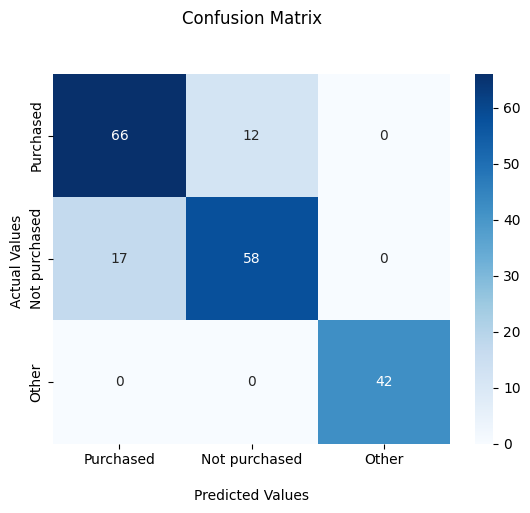

In [ ]:

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix' + '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['Purchased', 'Not purchased', 'Other'])
ax.yaxis.set_ticklabels(['Purchased', 'Not purchased', 'Other'])

plt.show()

In [26]:
print(conf_matrix.shape)


(3, 3)
